In [1]:
## Importing all necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem 1
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in analytics professional to improve the existing campaign.
The purpose of this report is to do Austo_automobile data analysis and suggest better ways of marketing campaign to target different segments present in the dataset to increase sales.


In [2]:
## Loading the csv data 

df=pd.read_csv(r"F:\Great Learning\Chapter 4-Statistical Method for Decision Making\Project\austo_automobile.csv")

In [3]:
## Top five records 
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
## Last five records
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


#### Problem 1.A
What is the important technical information about the dataset that a database administrator would be interested in?

In [5]:
## Shape of the dataset
df.shape
print("Number of rows present in the data are",df.shape[0])
print("Number of columns present in the data are",df.shape[1])

Number of rows present in the data are 1581
Number of columns present in the data are 14


In [73]:
## List of all columns present in the dataset
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

In [74]:
## Features and data type information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


#### Problem 1.B
Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data? If yes, perform preliminary treatment of data.

In [6]:
## Checking for null values
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
## Checking for duplicates 
df.duplicated().sum()

0

In [8]:
## Summary of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


In [9]:
## Missing values treatment for Gender column

df["Gender"].value_counts(dropna=False)

Gender
Male      1199
Female     327
NaN         53
Femal        1
Femle        1
Name: count, dtype: int64

In [10]:
## Correction for missing values and spelling mistakes
df["Gender"]=np.where(df["Gender"]=="Femal","Female",df["Gender"])
df["Gender"]=np.where(df["Gender"]=="Femle","Female",df["Gender"])
df["Gender"]=np.where(df["Gender"].isnull(),df["Gender"].mode()[0],df["Gender"])

In [11]:
df["Gender"].isnull().sum()

0

In [12]:
df["Gender"].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

In [13]:
## Missing values treatment for Partner_salary column
df.drop("Partner_salary",axis=1,inplace=True)
df["Partner_salary"]=df["Total_salary"]-df["Salary"]

In [14]:
df["Partner_salary"].isnull().sum()

0

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0


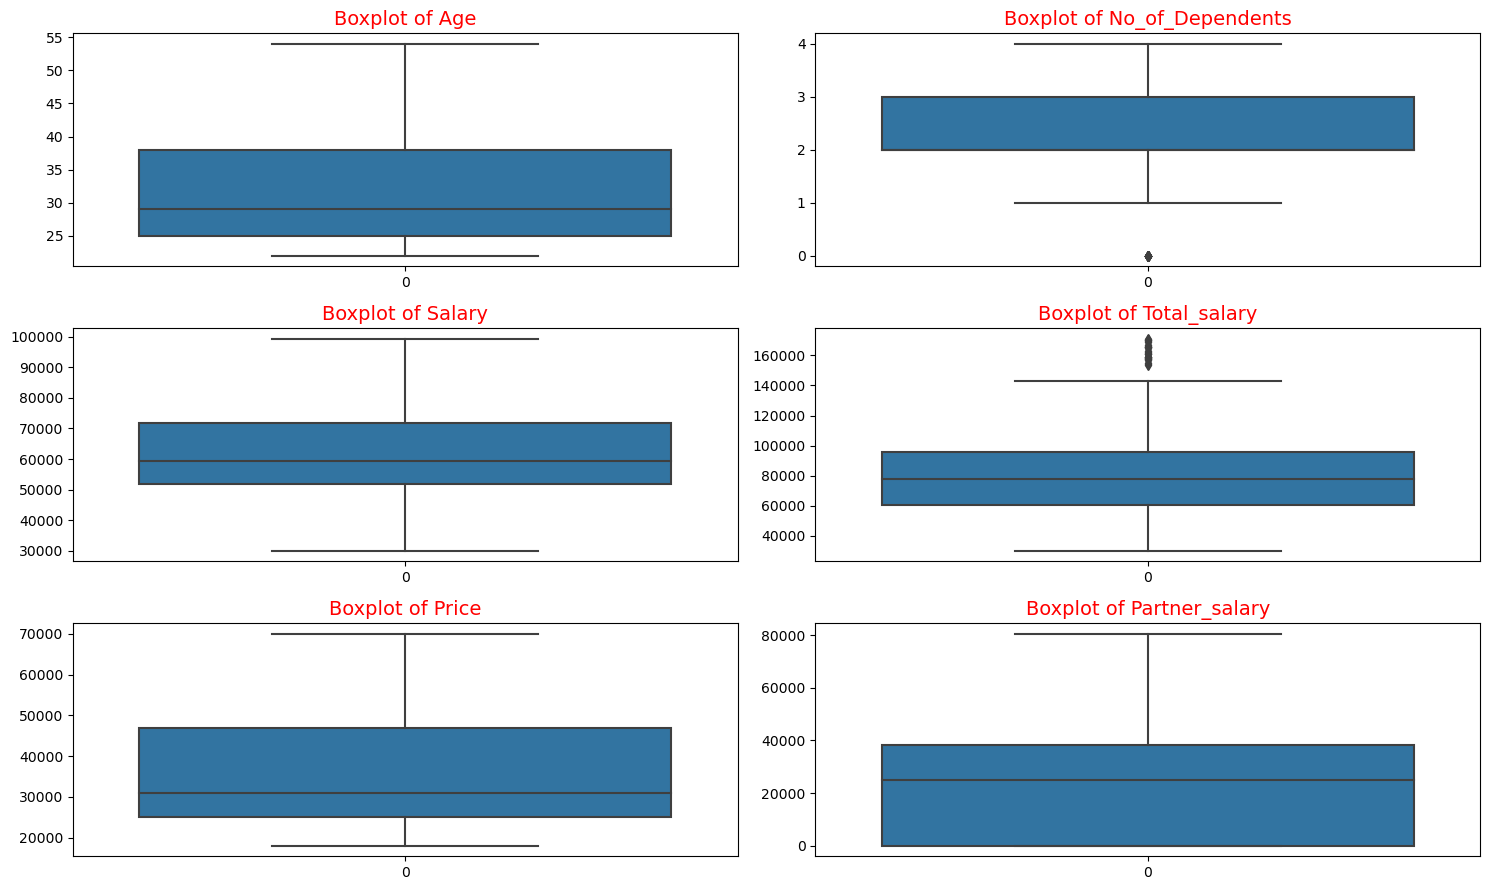

In [16]:
## Plotting of boxplot for outliers presence checking

df_plot=df.select_dtypes(["int64","float64"])
fig=plt.figure(figsize=(15,9))
for i in range(0,len(df_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(df_plot[df_plot.columns[i]])
    ax.set_title("Boxplot of {}".format(df_plot.columns[i]),color="red",fontsize=14)
    plt.tight_layout()

In [18]:
## Checking No_of_Dependents column
df["No_of_Dependents"].value_counts()

No_of_Dependents
3    557
2    557
1    229
4    218
0     20
Name: count, dtype: int64

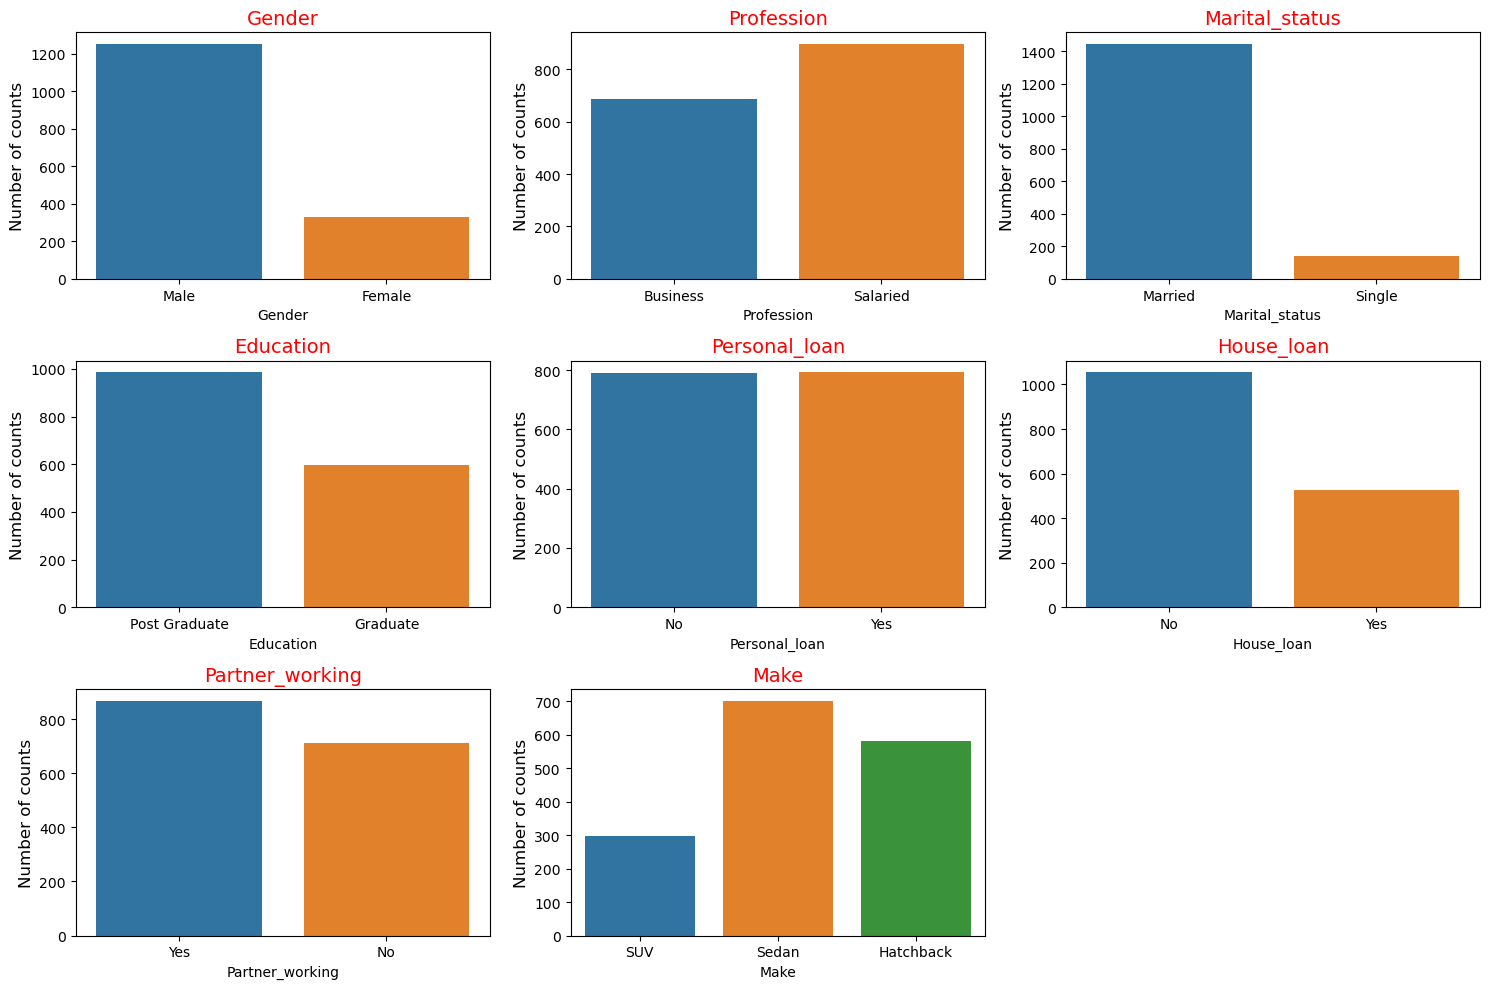

In [19]:
## Checking for discrepancies in Categorical columns
df_plot=df.select_dtypes(["object"])
fig=plt.figure(figsize=(15,10))
for i in range(0,len(df_plot.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(data=df,x=df_plot[df_plot.columns[i]])
    ax.set_title(df_plot.columns[i],color="red",fontsize=14)
    ax.set_ylabel("Number of counts",fontsize=12)
    plt.tight_layout()

In [20]:
## Checking for if customers who are single are having no working partner.
df_single=df[df["Marital_status"]=="Single"]
print(df_single["Partner_salary"].value_counts())
print(df_single["Partner_working"].value_counts())

Partner_salary
0    138
Name: count, dtype: int64
Partner_working
No    138
Name: count, dtype: int64


#### Problem 1.C
Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

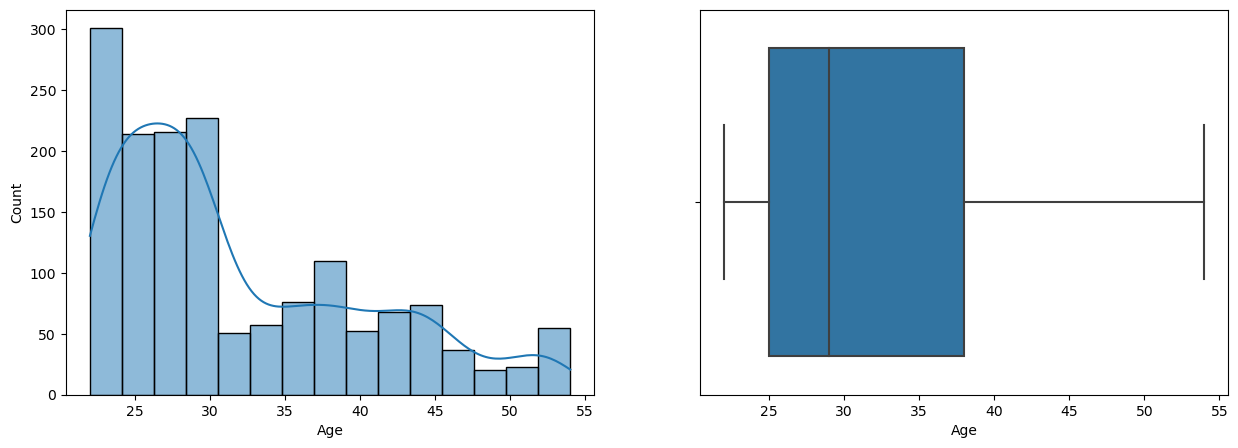

In [21]:
## Continuous feature analysis(Univeriate Analysis)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["Age"],kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Age")
plt.show()

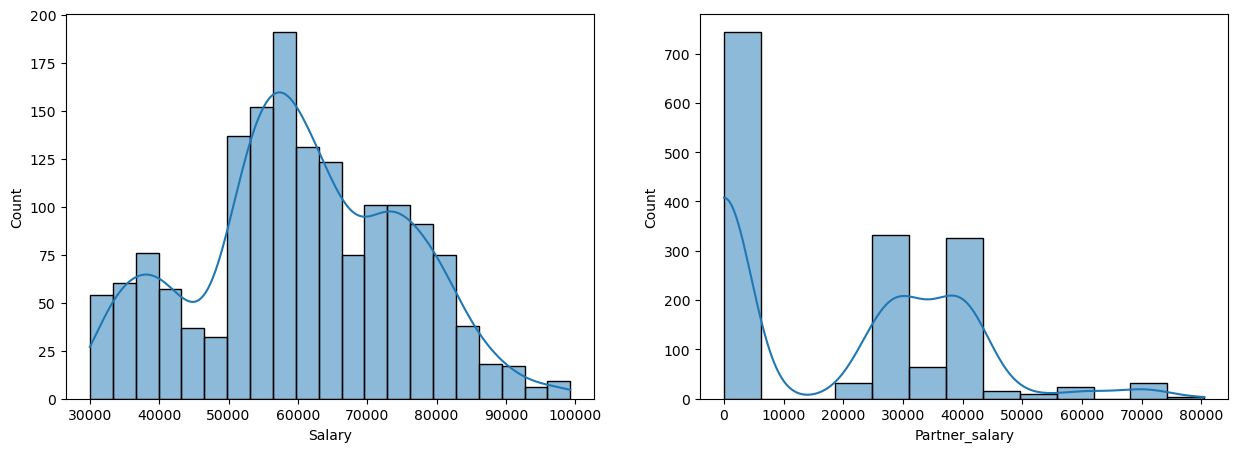

In [23]:
## Histplot of Salary and partner_salary
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["Salary"],kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x="Partner_salary",kde=True)
plt.show()

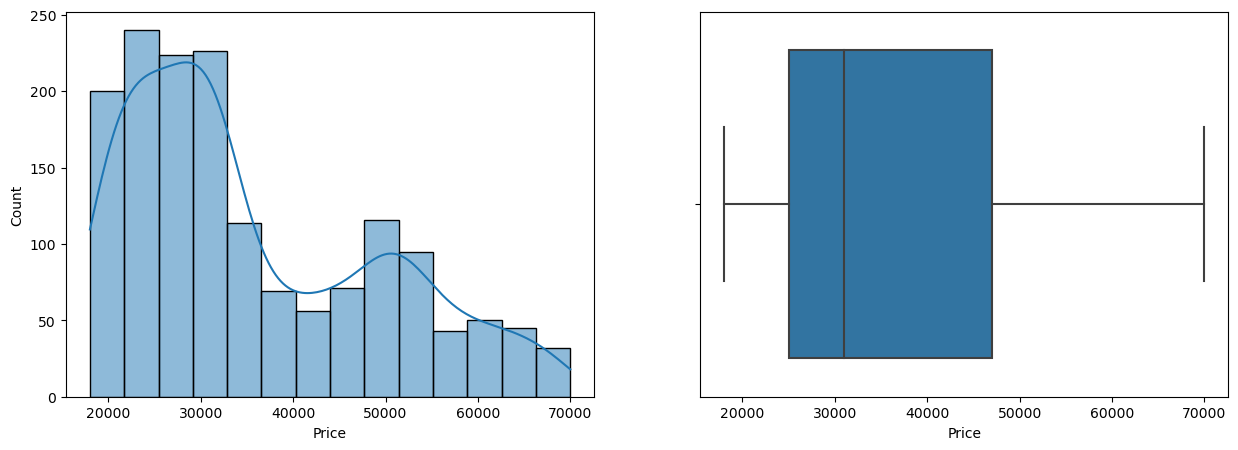

In [24]:
## Histogram of car prices
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(df["Price"],kde=True)
plt.subplot(1,2,2)
sns.boxplot(data=df,x="Price")
plt.show()

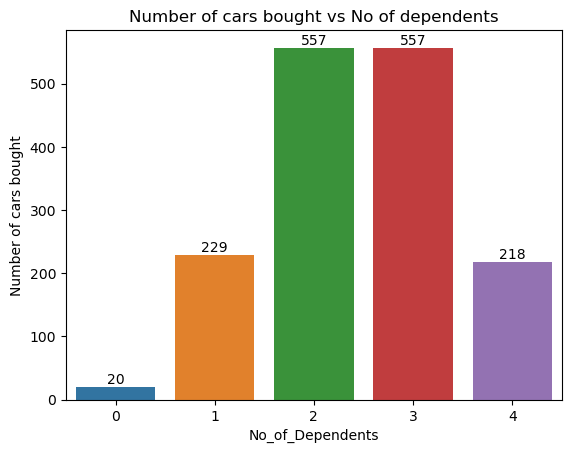

In [25]:
## Dependents analysis on car purchase
ax=sns.countplot(data=df, x="No_of_Dependents")
ax.bar_label(ax.containers[0])
plt.title("Number of cars bought vs No of dependents")
plt.ylabel("Number of cars bought")
plt.show()

#### Problem 1.D
Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data. 

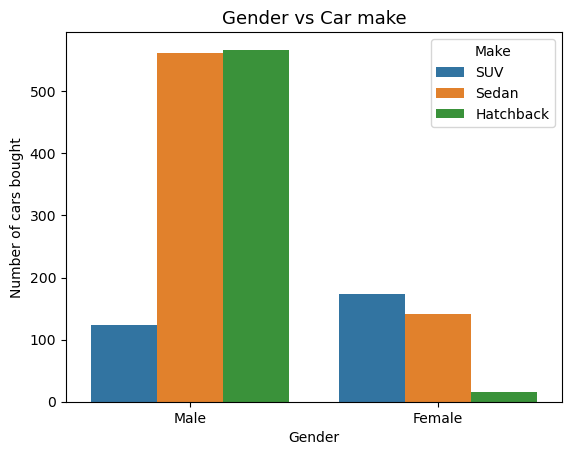

In [26]:
## Bivariate Analysis
sns.countplot(data=df, x="Gender",hue="Make")
plt.title("Gender vs Car make",fontsize=13)
plt.ylabel("Number of cars bought")
plt.show()

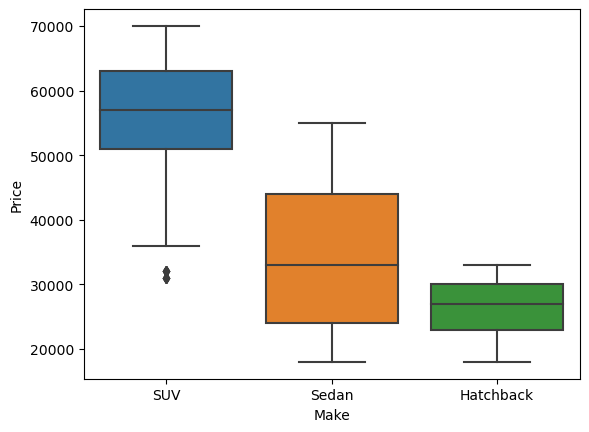

In [27]:
## Car prices for different Make
sns.boxplot(data=df,x="Make",y="Price")
plt.show()

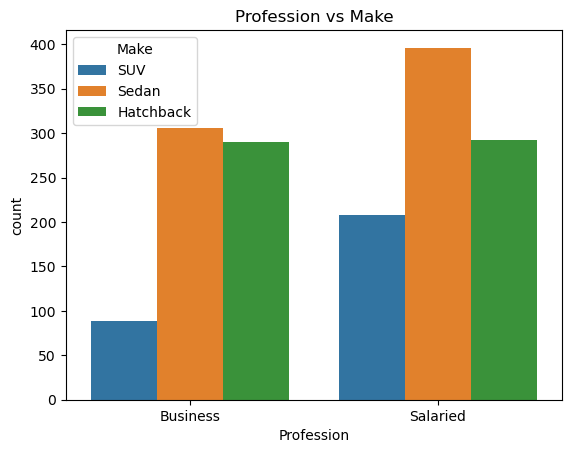

In [28]:
## Plot between Profession and Make
sns.countplot(data=df,x="Profession",hue="Make")
plt.title("Profession vs Make")
plt.show()

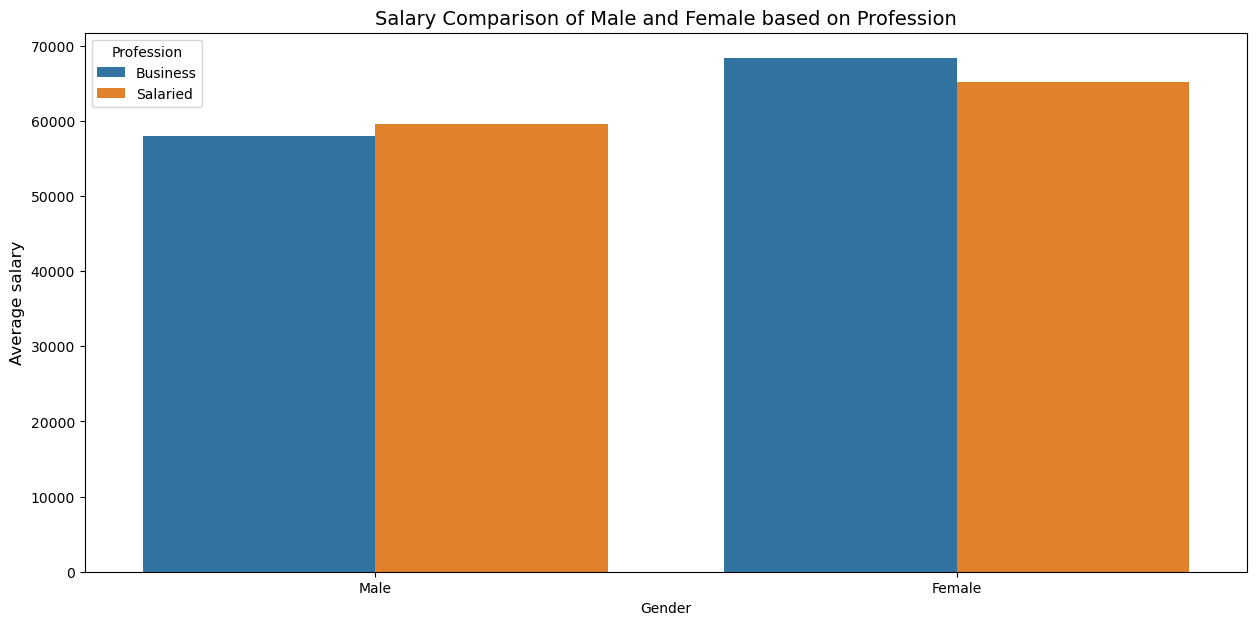

In [29]:
## Multivariate Analysis
plt.figure(figsize=(15,7))
sns.barplot(data=df,x="Gender",y="Salary",hue="Profession",errorbar=None)
plt.title("Salary Comparison of Male and Female based on Profession",fontsize=14)
plt.ylabel("Average salary",fontsize=12)
plt.show()

In [30]:
## Calculation of difference between person salary and partner salary
df["Diff_of_sal"]=df["Salary"]-df["Partner_salary"]

In [31]:
def true_false(Diff_of_sal):
    if Diff_of_sal>=0:
        return True 
    else:
        return False

In [32]:
df["P_or_N_diff"]=df["Diff_of_sal"].apply(true_false)

In [33]:
df["P_or_N_diff"].value_counts()

P_or_N_diff
True     1515
False      66
Name: count, dtype: int64

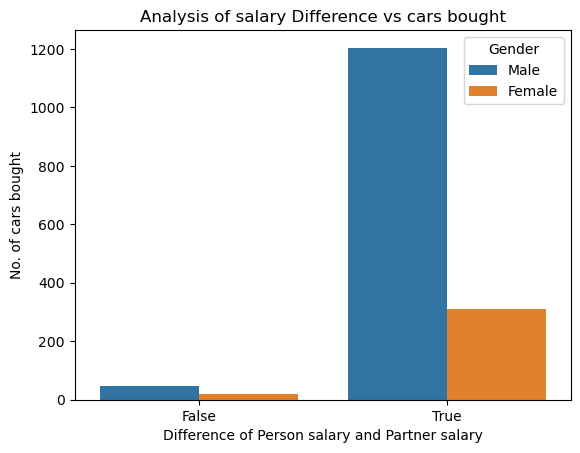

In [35]:
## plotting of salary and partner salary differences 
sns.countplot(data=df,x="P_or_N_diff",hue="Gender")
plt.xlabel("Difference of Person salary and Partner salary")
plt.ylabel("No. of cars bought")
plt.title("Analysis of salary Difference vs cars bought")
plt.show()

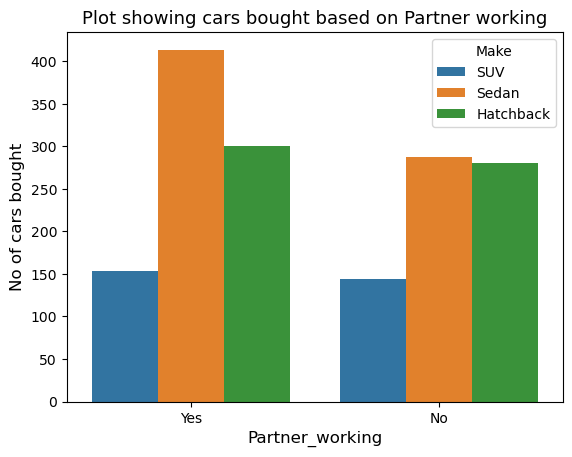

In [36]:
## Plot of partner_working based on car Make
sns.countplot(data=df, x="Partner_working", hue="Make")
plt.ylabel("No of cars bought",fontsize=12)
plt.xlabel("Partner_working",fontsize=12)
plt.title("Plot showing cars bought based on Partner working",fontsize=13)
plt.show()

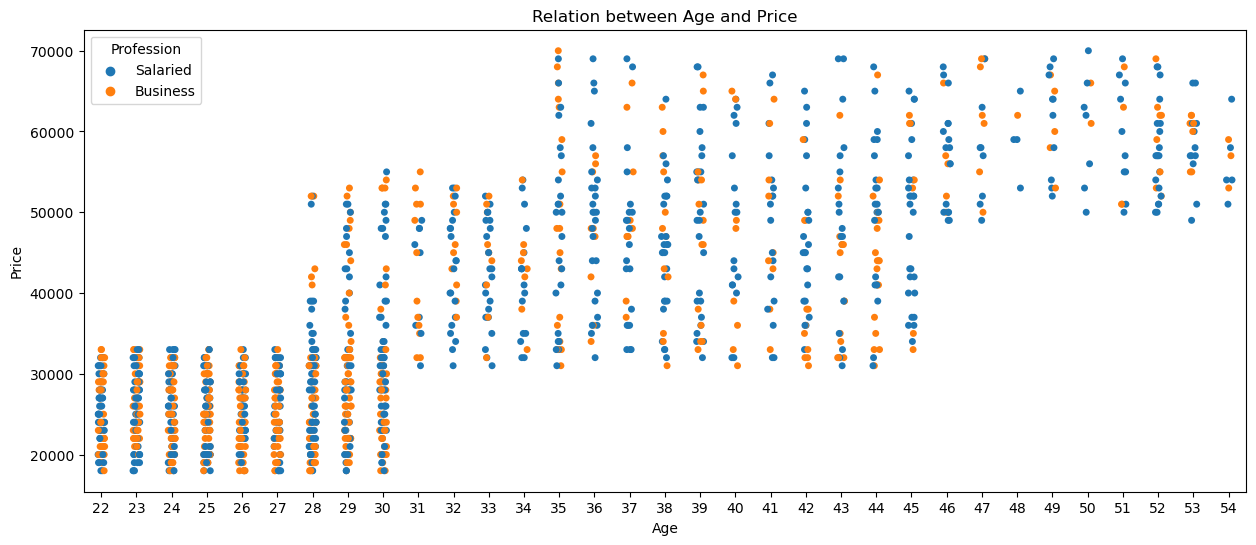

In [37]:
## Strip plot between age and price
plt.figure(figsize=(15,6))
sns.stripplot(data=df,x="Age",y="Price",hue="Profession")
plt.title("Relation between Age and Price")
plt.show()

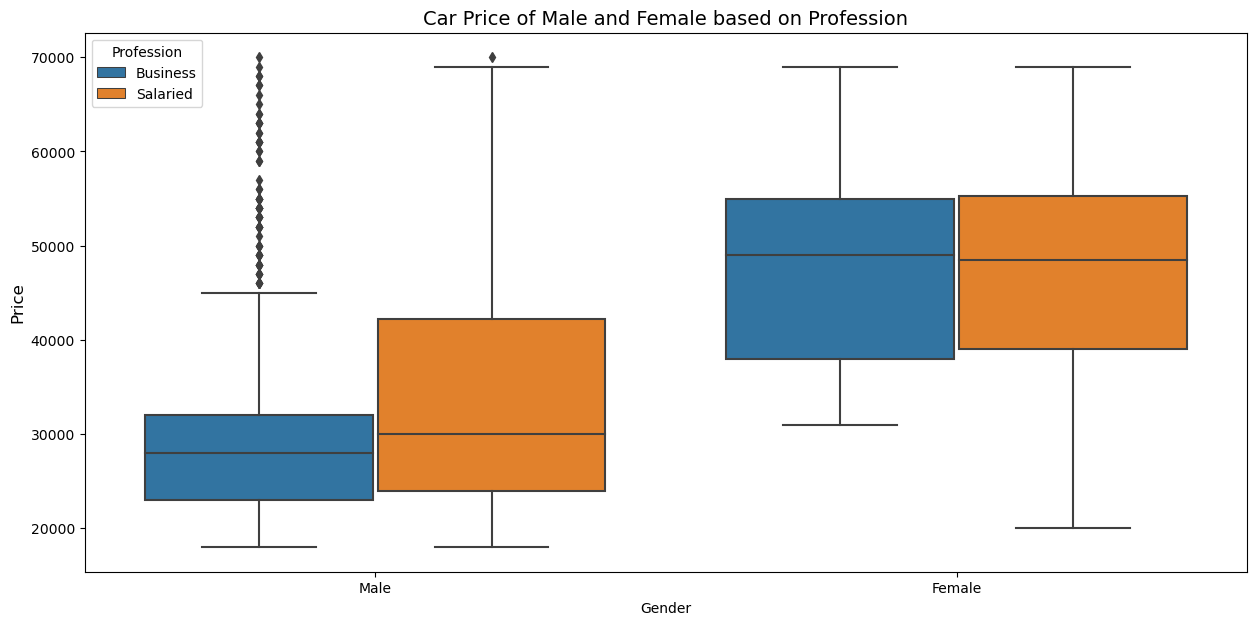

In [38]:
## Multivariate Analysis
plt.figure(figsize=(15,7))
sns.boxplot(data=df,x="Gender",y="Price",hue="Profession")
plt.title("Car Price of Male and Female based on Profession",fontsize=14)
plt.ylabel("Price",fontsize=12)
plt.show()

#### Problem 1.E
Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

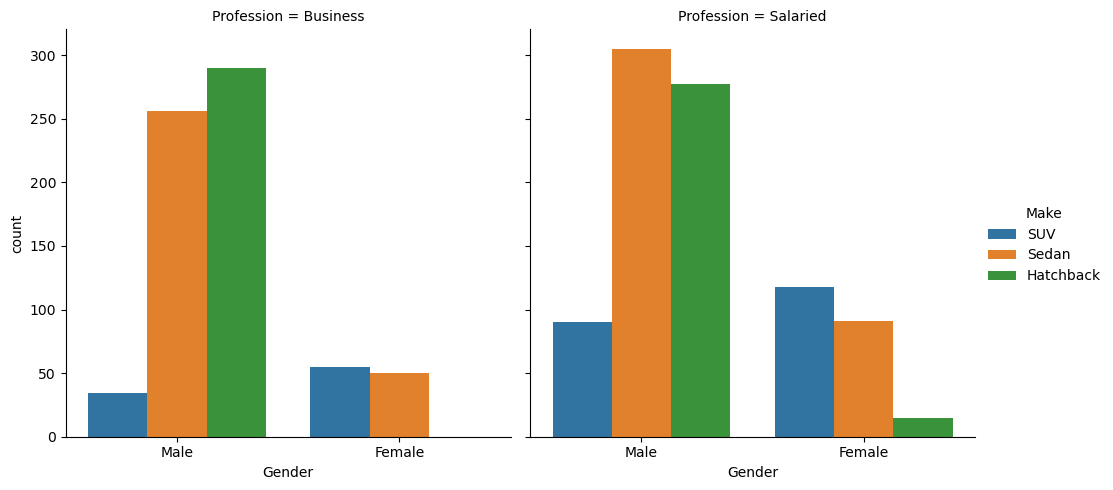

In [39]:
## Multivariate Analysis
sns.catplot(x="Gender",hue="Make",col="Profession",data=df,kind="count")
plt.show()

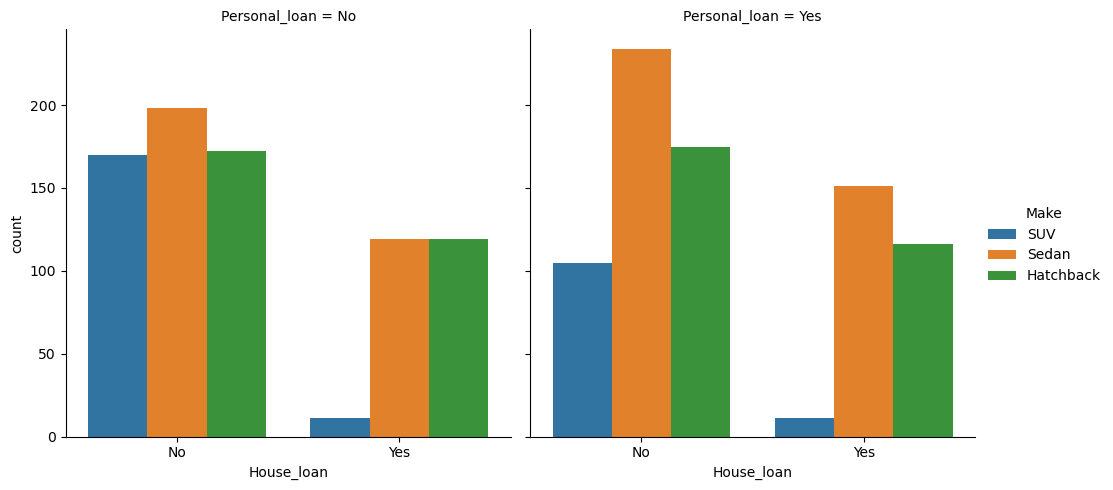

In [38]:
sns.catplot(x="House_loan",hue="Make",col="Personal_loan",data=df,kind="count")
plt.show()

#### Problem 1.F
From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.
Give justification along with presenting metrics/charts used for arriving at the conclusions.


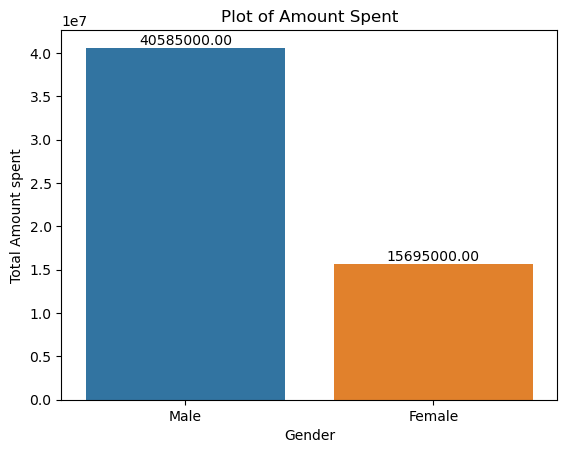

In [40]:
## Amount spent on buying automobiles 
ax=sns.barplot(x="Gender",y="Price",data=df,estimator=np.sum,errorbar=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("Plot of Amount Spent")
plt.ylabel("Total Amount spent")
plt.show()

In [41]:
df["Price"].sum()

56280000

In [42]:
df["Gender"].value_counts()

Gender
Male      1252
Female     329
Name: count, dtype: int64

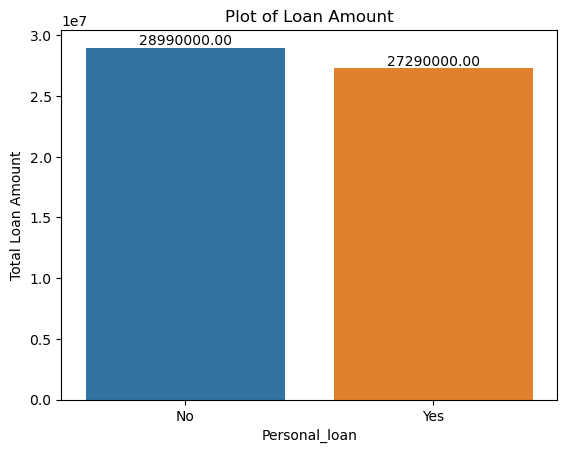

In [139]:
## Loan Amount taken to buy Automobiles
ax=sns.barplot(x="Personal_loan",y="Price",data=df,estimator=np.sum,errorbar=None)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title("Plot of Loan Amount")
plt.ylabel("Total Loan Amount")
plt.show()

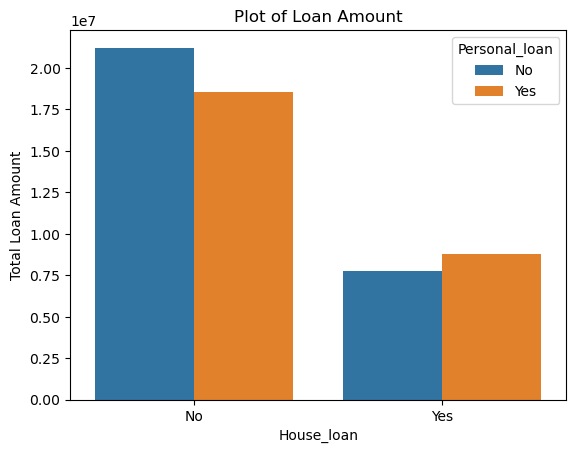

In [140]:
## Loan Amount taken to buy Automobiles with hue as House _loan
sns.barplot(x="House_loan",y="Price",data=df,estimator=np.sum,errorbar=None,hue="Personal_loan")
plt.title("Plot of Loan Amount")
plt.ylabel("Total Loan Amount")
plt.show()

In [43]:
df.groupby(["House_loan","Personal_loan"])["House_loan"].count()

House_loan  Personal_loan
No          No               540
            Yes              514
Yes         No               249
            Yes              278
Name: House_loan, dtype: int64

#### Problem 1.G
From the current data set comment if having a working partner leads to the purchase of a higher-priced car.

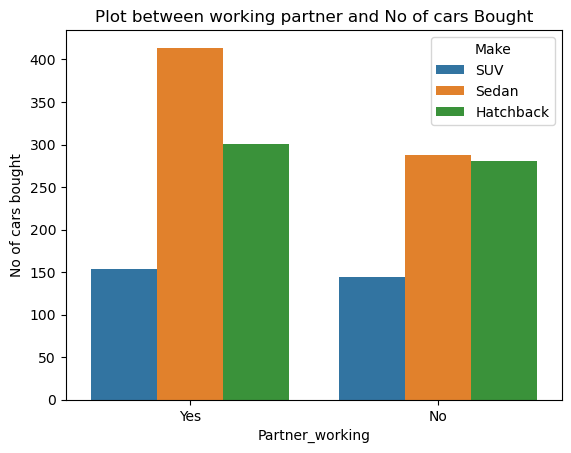

In [44]:
## Relation between Working partner and type of cars bought
sns.countplot(data=df, x="Partner_working",hue="Make")
plt.title("Plot between working partner and No of cars Bought")
plt.ylabel("No of cars bought")
plt.show()

#### Problem 1.H
The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital_status - fields to arrive at groups with similar purchase history.

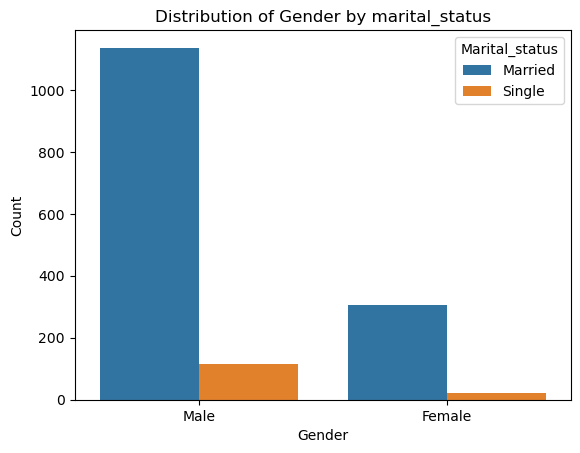

In [141]:
sns.countplot(data=df,x="Gender",hue="Marital_status")
plt.title("Distribution of Gender by marital_status")
plt.ylabel("Count");

In [47]:
df.groupby(["Gender","Marital_status"])["Marital_status"].count()

Gender  Marital_status
Female  Married            307
        Single              22
Male    Married           1136
        Single             116
Name: Marital_status, dtype: int64

## Problem 2
GODIGT Bank is a mid-sized private bank that deals in all kinds of banking products, such as savings accounts, current accounts, investment products, etc. among other offerings. The bank also cross-sells asset products to its existing customers through personal loans, auto loans, business loans, etc., and to do so they use various communication methods including cold calling, e-mails, recommendations on the net banking, mobile banking, etc.

GODIGT Bank also has a set of customers who were given credit cards based on risk policy and customer category class but due to huge competition in the credit card market, the bank is observing high attrition in credit card spending. The bank makes money only if customers spend more on credit cards. Given the attrition, the Bank wants to revisit its credit card policy and make sure that the card given to the customer is the right credit card. The bank will make a profit only through the customers that show higher intent towards a recommended credit card. (Higher intent means consumers would want to use the card and hence not be attrite.)

In [48]:
## Loading the excel dataset file
df=pd.read_excel("F:\Great Learning\Chapter 4-Statistical Method for Decision Making\Project\godigt_cc_data.xlsx")

In [49]:
## Loading top five records
df.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [50]:
## Loading last five records
df.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [51]:
## Shape of datasets
df.shape

(8448, 28)

In [52]:
## Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [53]:
## Checking for null values
df.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [54]:
## Dropping null values
df.dropna(inplace=True)

In [55]:
df.reset_index(drop=True,inplace=True)

In [56]:
df.shape

(8410, 28)

In [57]:
## Basic description of data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
userid,8410.0,4224.651605,1.0,2112.25,4224.5,6336.75,8448.0,2439.528928
card_bin_no,8410.0,436770.635077,376916.0,426241.0,437551.0,438439.0,524178.0,30516.857734
card_source_date,8410,2009-06-20 12:55:59.429250816,1998-07-24 00:00:00,2004-01-08 06:00:00,2009-05-24 12:00:00,2014-11-27 18:00:00,2020-06-17 00:00:00,NaN
active_30,8410.0,0.292509,0.0,0.0,0.0,1.0,1.0,0.454942
active_60,8410.0,0.494768,0.0,0.0,0.0,1.0,1.0,0.500002
active_90,8410.0,0.642449,0.0,0.0,1.0,1.0,1.0,0.479307
cc_active30,8410.0,0.283948,0.0,0.0,0.0,1.0,1.0,0.450939
cc_active60,8410.0,0.484067,0.0,0.0,0.0,1.0,1.0,0.499776
cc_active90,8410.0,0.631867,0.0,0.0,1.0,1.0,1.0,0.482326
widget_products,8410.0,3.625327,0.0,2.0,4.0,6.0,7.0,2.272034


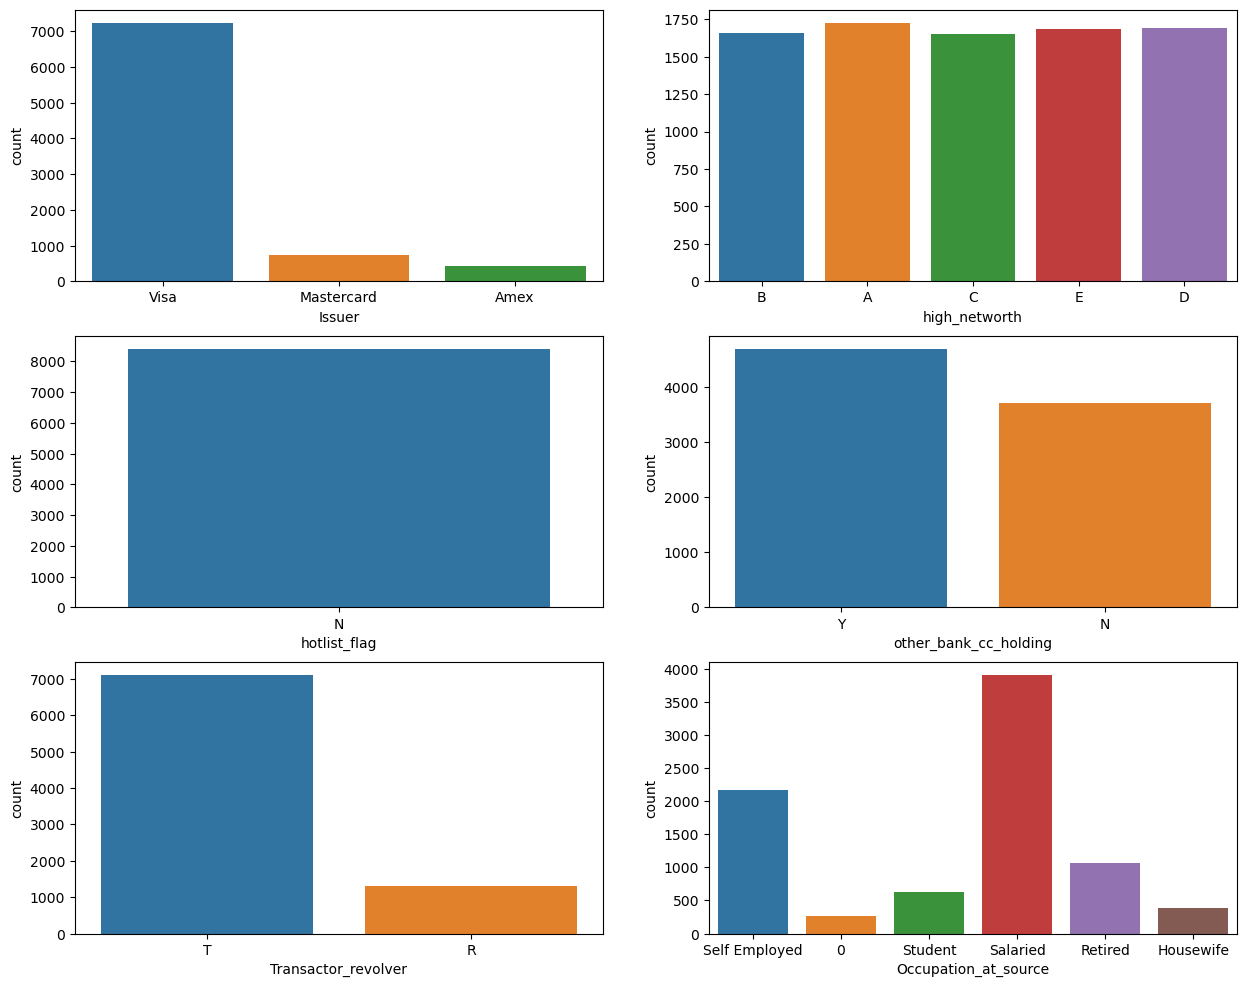

In [58]:
## Checking for discrepancies in Categorical columns
df_plot=["Issuer","high_networth","hotlist_flag","other_bank_cc_holding","Transactor_revolver","Occupation_at_source"]
fig=plt.figure(figsize=(15,12))
for i in range(0,len(df_plot)):
    ax=fig.add_subplot(3,2,i+1)
    sns.countplot(data=df, x=df[df_plot[i]])

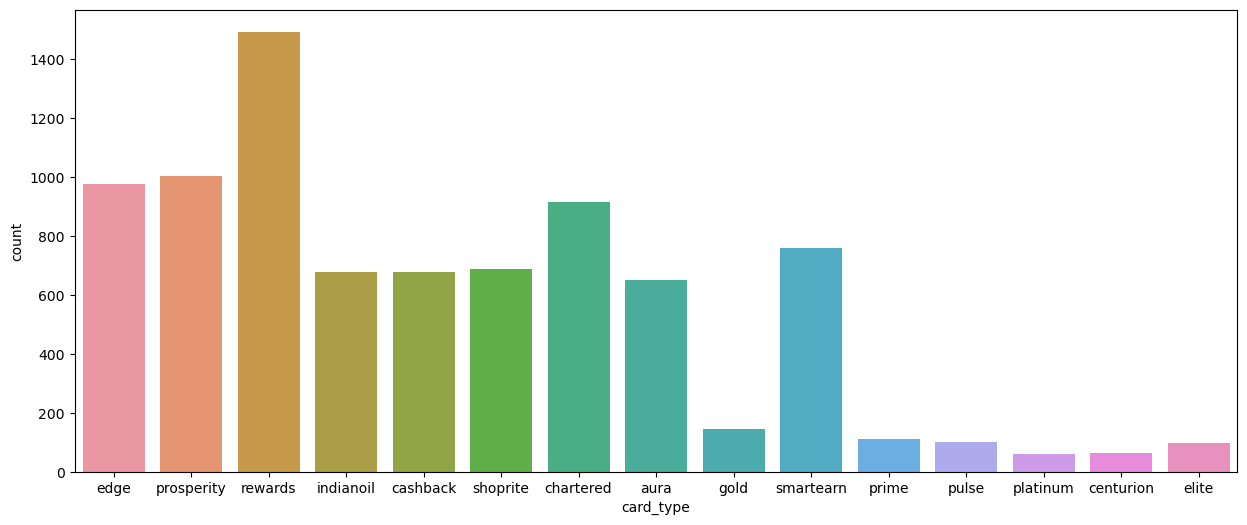

In [59]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x="card_type")
plt.show()

In [60]:
## Dropping of columns userid, card_bin_no, card_no,card_source_date and hotlist_flag 
df.drop(["userid","card_bin_no","card_no","card_source_date","hotlist_flag"],axis=1, inplace=True)

In [61]:
## Summary of numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
active_30,8410.0,2.925089e-01,4.549418e-01,0.0,0.0,0.0,1.0,1.0
active_60,8410.0,4.947681e-01,5.000024e-01,0.0,0.0,0.0,1.0,1.0
active_90,8410.0,6.424495e-01,4.793073e-01,0.0,0.0,1.0,1.0,1.0
cc_active30,8410.0,2.839477e-01,4.509385e-01,0.0,0.0,0.0,1.0,1.0
cc_active60,8410.0,4.840666e-01,4.997758e-01,0.0,0.0,0.0,1.0,1.0
cc_active90,8410.0,6.318668e-01,4.823264e-01,0.0,0.0,1.0,1.0,1.0
widget_products,8410.0,3.625327e+00,2.272034e+00,0.0,2.0,4.0,6.0,7.0
engagement_products,8410.0,4.006778e+00,2.567130e+00,0.0,2.0,4.0,6.0,8.0
annual_income_at_source,8410.0,1.674374e+06,1.064592e+06,200095.0,1061494.5,1371687.0,1881414.5,4999508.0
bank_vintage,8410.0,3.315779e+01,1.587166e+01,6.0,19.0,33.0,47.0,60.0


In [62]:
## Replacing 0 with Salaried
df["Occupation_at_source"]=np.where(df["Occupation_at_source"]==0,df["Occupation_at_source"].mode()[0],df["Occupation_at_source"])

In [63]:
df["Occupation_at_source"].value_counts()

Occupation_at_source
Salaried         4168
Self Employed    2170
Retired          1067
Student           621
Housewife         384
Name: count, dtype: int64

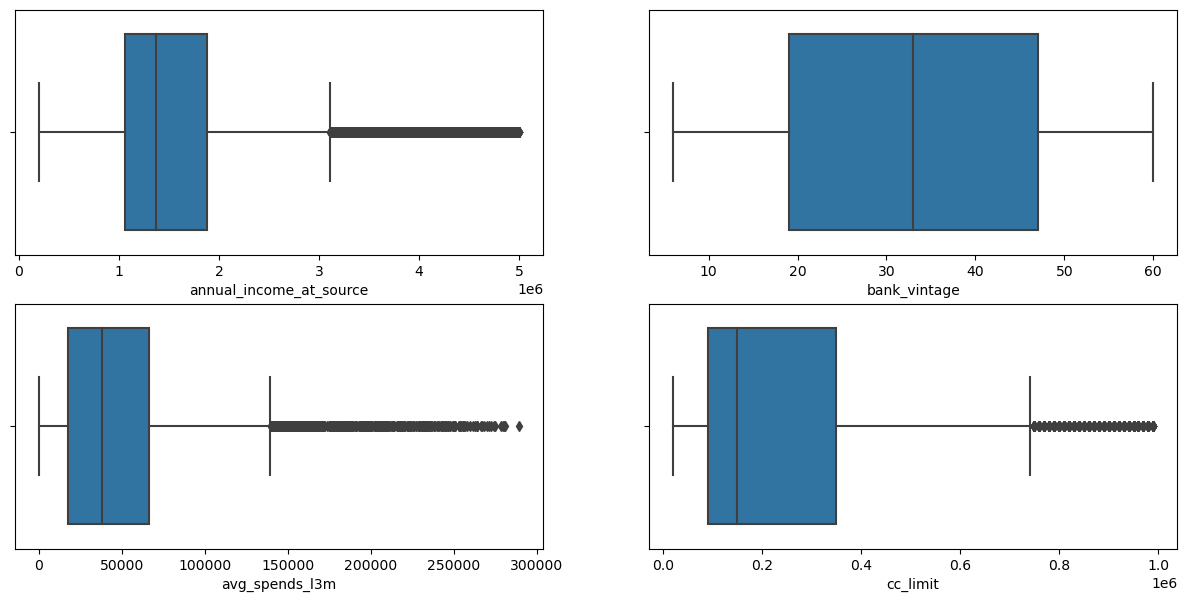

In [64]:
## Checking for outliers
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(data=df,x="annual_income_at_source")
plt.subplot(2,2,2)
sns.boxplot(data=df,x="bank_vintage")
plt.subplot(2,2,3)
sns.boxplot(data=df,x="avg_spends_l3m")
plt.subplot(2,2,4)
sns.boxplot(data=df,x="cc_limit")
plt.show()

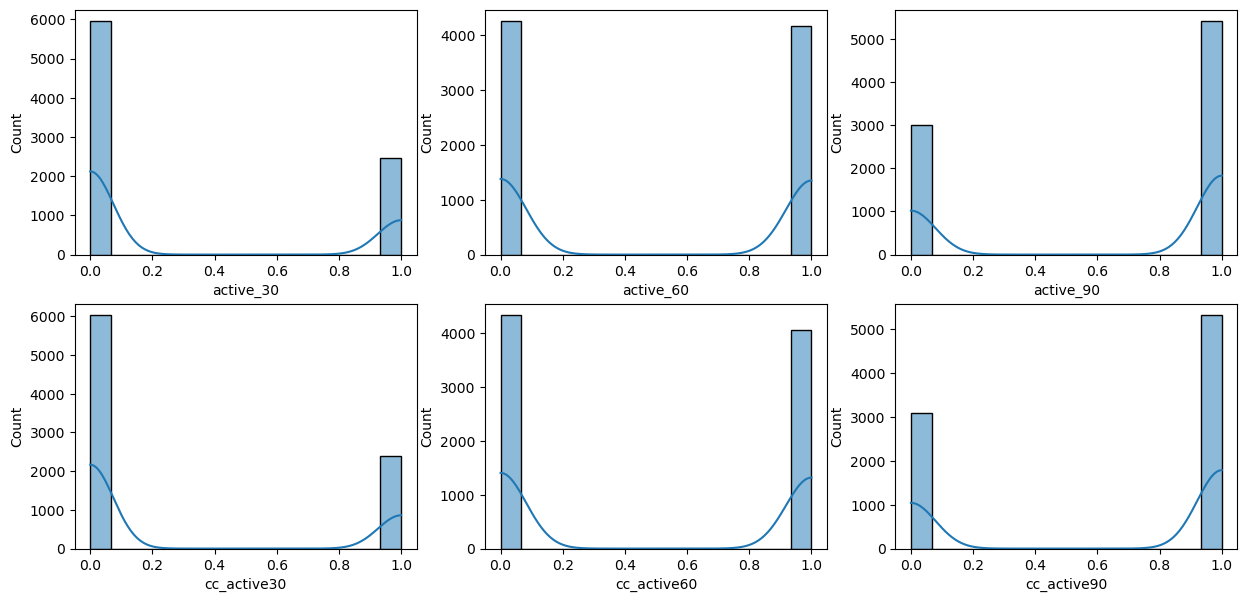

In [65]:
## Account activity for 30,60 and 90 days
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.histplot(data=df,x="active_30",kde=True)
plt.subplot(2,3,2)
sns.histplot(data=df,x="active_60",kde=True)
plt.subplot(2,3,3)
sns.histplot(data=df,x="active_90",kde=True)
plt.subplot(2,3,4)
sns.histplot(data=df,x="cc_active30",kde=True)
plt.subplot(2,3,5)
sns.histplot(data=df,x="cc_active60",kde=True)
plt.subplot(2,3,6)
sns.histplot(data=df,x="cc_active90",kde=True)
plt.show()

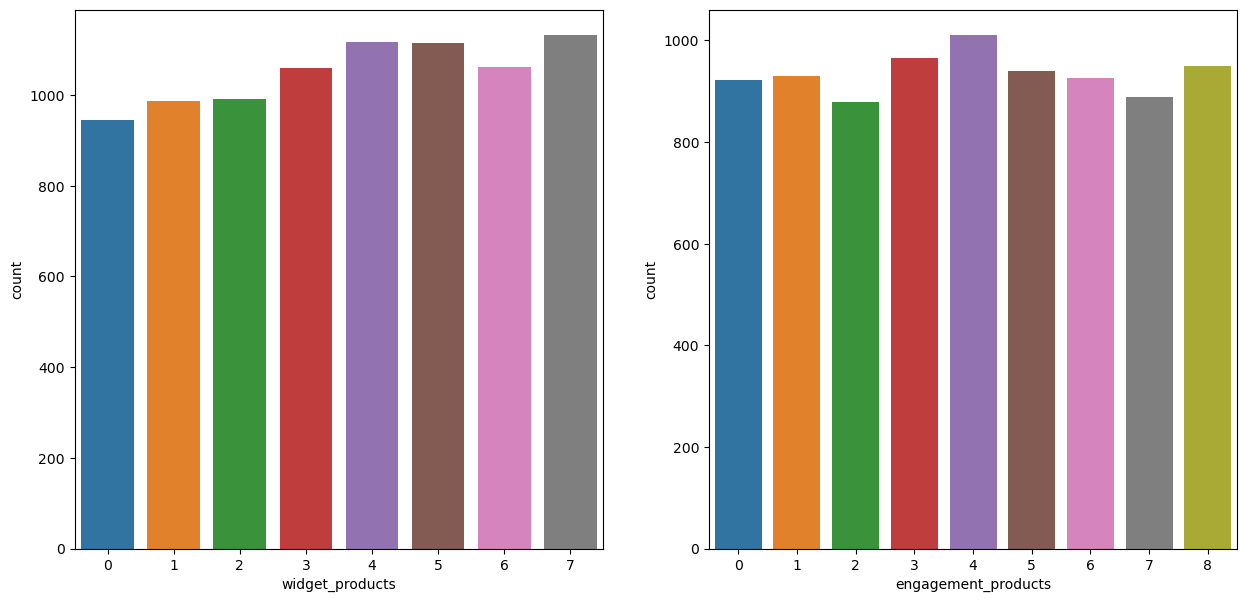

In [234]:
## Countplot 
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.countplot(data=df,x="widget_products")
plt.subplot(1,2,2)
sns.countplot(data=df,x="engagement_products")
plt.show()

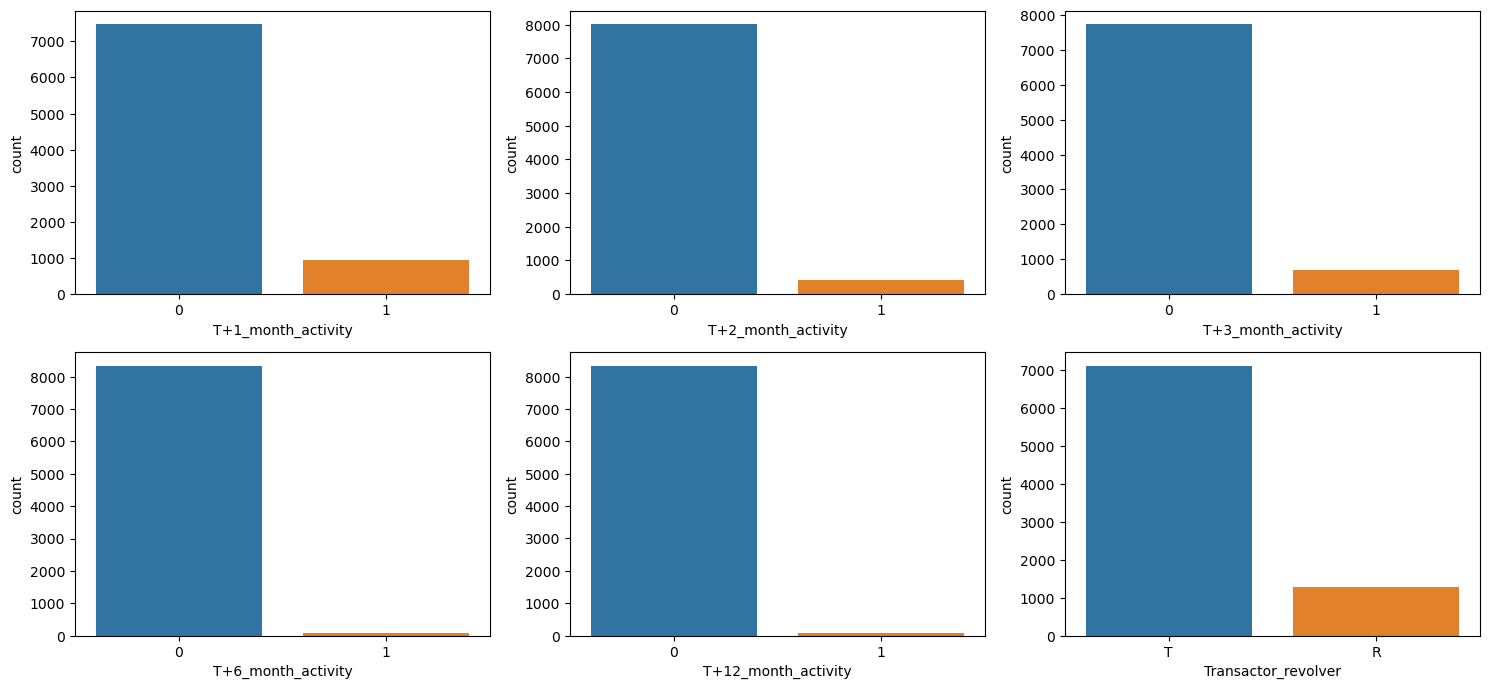

In [244]:
## Cout plot
plt.figure(figsize=(15,7))
plt.subplot(2,3,1)
sns.countplot(data=df,x="T+1_month_activity")
plt.subplot(2,3,2)
sns.countplot(data=df,x="T+2_month_activity")
plt.subplot(2,3,3)
sns.countplot(data=df,x="T+3_month_activity")
plt.subplot(2,3,4)
sns.countplot(data=df,x="T+6_month_activity")
plt.subplot(2,3,5)
sns.countplot(data=df,x="T+12_month_activity")
plt.subplot(2,3,6)
sns.countplot(data=df,x="Transactor_revolver")
plt.tight_layout()
plt.show()

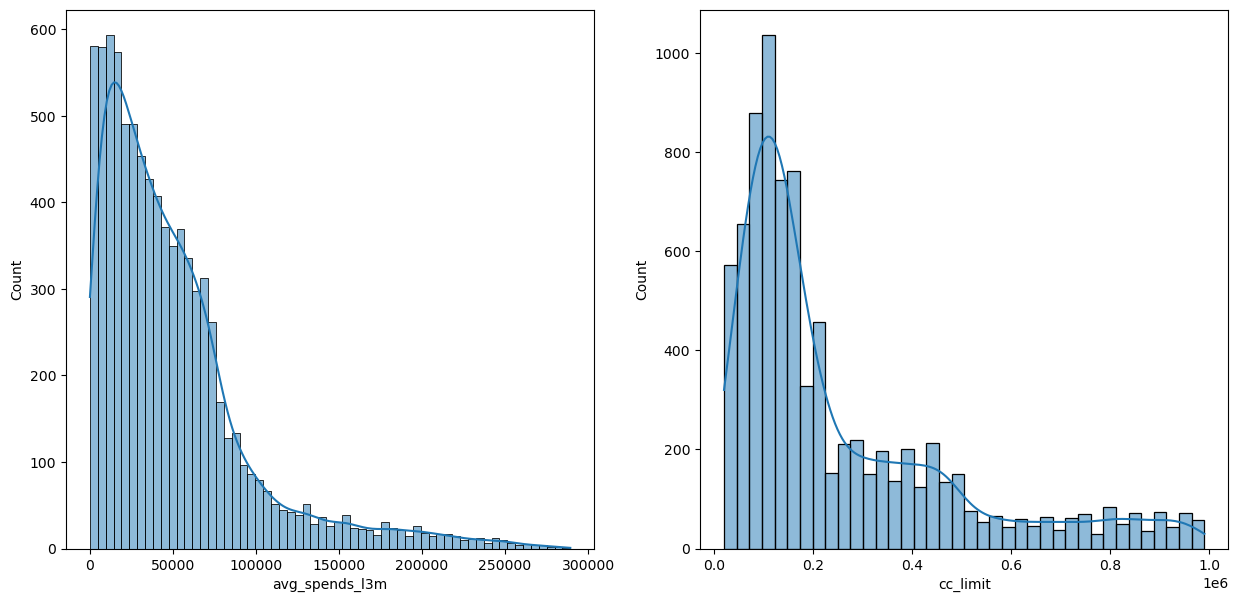

In [247]:
## Histogram
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x="avg_spends_l3m",kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x="cc_limit",kde=True)
plt.show()